In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_series( time, series, format="-", start=0, end=None, label=None):
	plt.plot( time[ start:end], series[ start:end], format, label=label)
	plt.xlabel( "Time")
	plt.ylabel( "Value")
	if label:
		plt.legend( fontsize=14)
	plt.grid( True)


In [3]:
def trend( time, slope=0):
	return slope * time

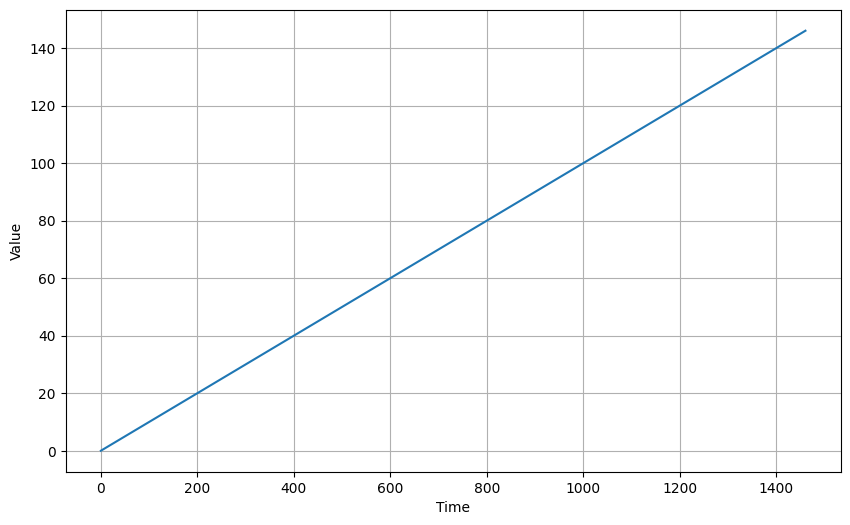

In [4]:
time = np.arange( 4 * 365 + 1)
baseline = 10
series = trend( time, 0.1)

plt.figure( figsize=( 10, 6))
plot_series( time, series)
plt.show()

In [5]:
def seasonal_pattern( season_time):
	return np.where(
		season_time < 0.4,
		np.cos( season_time * 2 * np.pi),
		1 / np.exp( 3 * season_time)
	)

def seasonality( time, period, amplitude=1, phase=0):
	season_time = ( ( time + phase) % period) / period
	return amplitude * seasonal_pattern( season_time)

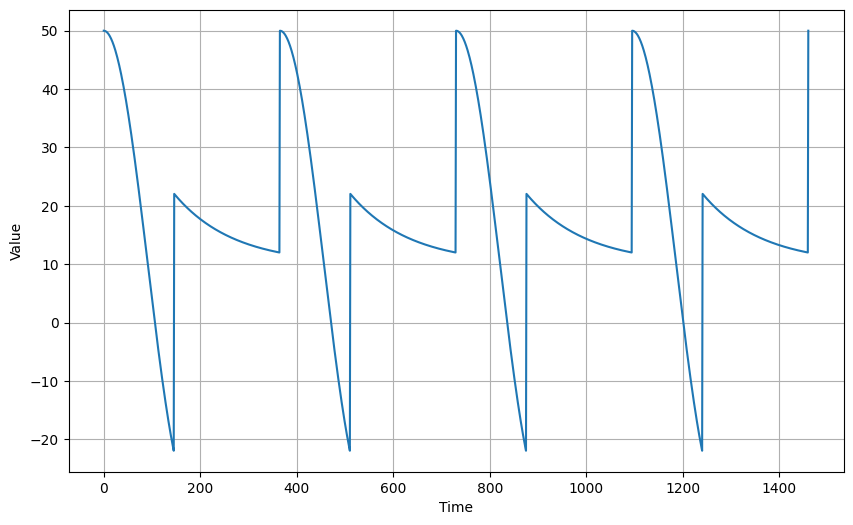

In [6]:
baseline = 10
amplitude = 40
series = baseline + seasonality( time, period=365, amplitude=amplitude)

plt.figure( figsize=( 10, 6))
plot_series( time, series)
plt.show()

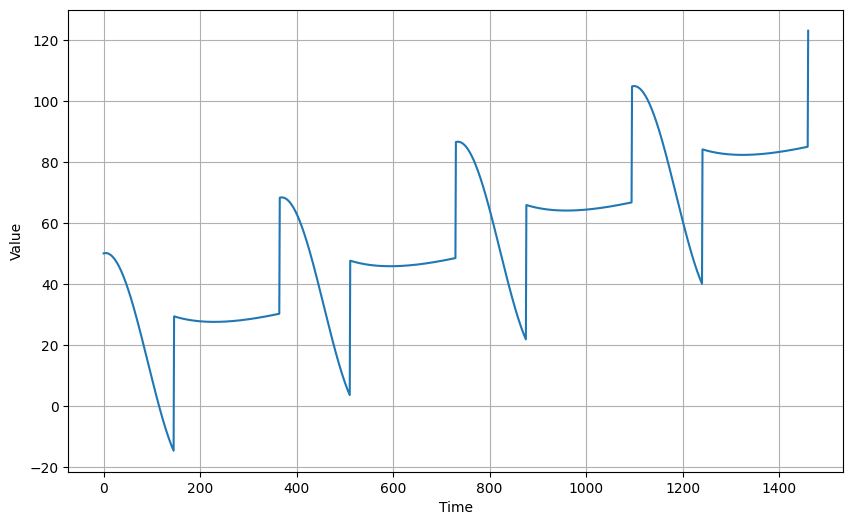

In [7]:
baseline = 10
slope = 0.05
amplitude = 40

series = baseline + trend( time, slope) + seasonality( time, period=365, amplitude=amplitude)

plt.figure( figsize=( 10, 6))
plot_series( time, series)
plt.show()

In [8]:
def white_noise( time, noise_level=1, seed=None):
	rnd = np.random.RandomState( seed)
	return rnd.randn( len( time)) * noise_level

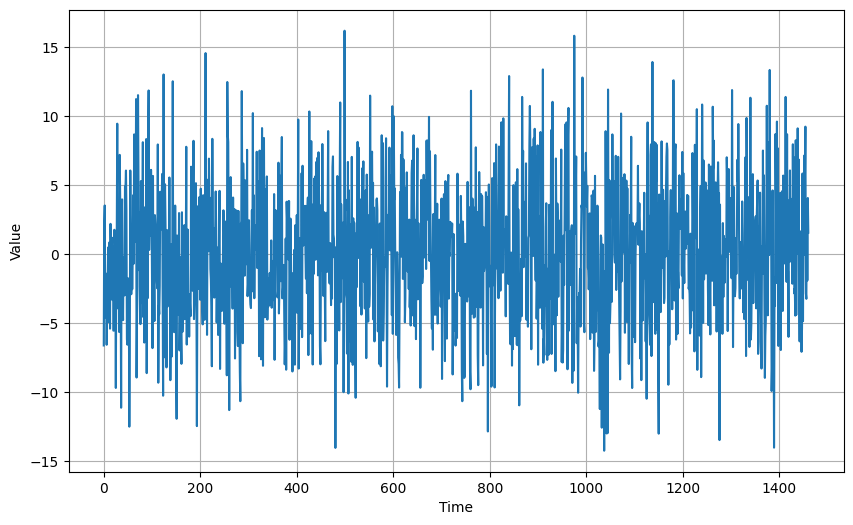

In [9]:
noise_level = 5
noise = white_noise( time, noise_level)

plt.figure( figsize=( 10, 6))
plot_series( time, noise)
plt.show()

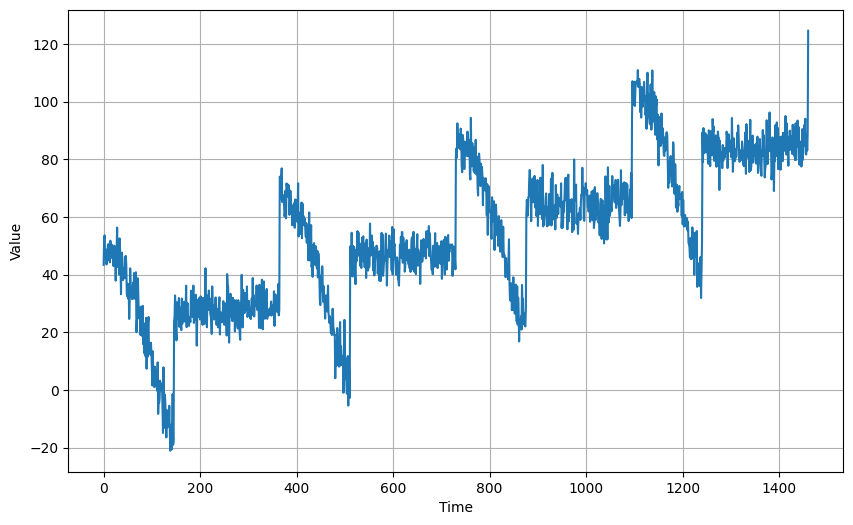

In [10]:
series += noise

plt.figure( figsize=( 10, 6))
plot_series( time, series)
plt.show()

In [11]:
def autocorrelation( time, amplitude, seed=None):
	rnd = np.random.RandomState( seed)
	d1 = 0.5
	d2 = -0.1

	ar = rnd.randn( len( time) + 50)
	ar[ :50] = 100
	for step in range( 50, len( time) + 50):
		ar[ step] += d1 * ar[ step - 50]
		ar[ step] += d2 * ar[ step - 33]

	return ar[ 50:] * amplitude

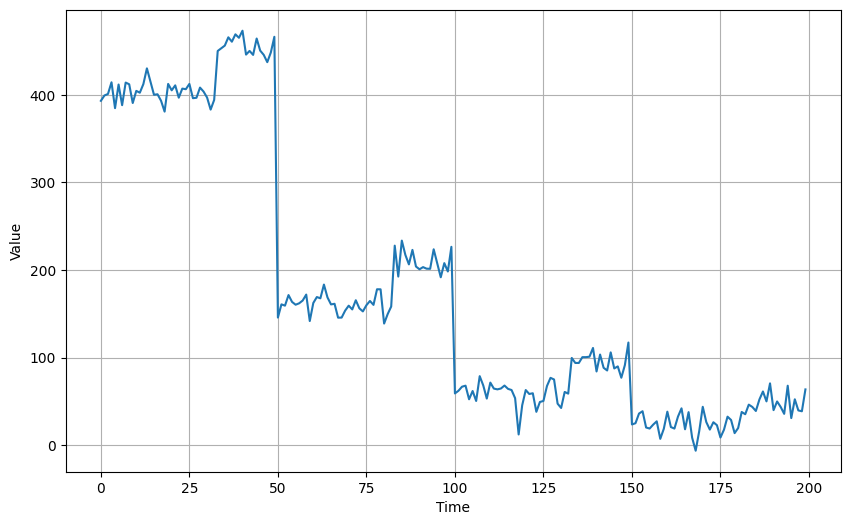

In [12]:
series = autocorrelation( time, 10)

plt.figure( figsize=( 10, 6))
plot_series( time[ :200], series[ :200])
plt.show()

In [13]:
def autocorrelation2( time, amplitude, seed=None):
	rnd = np.random.RandomState( seed)
	d = 0.8
	ar = rnd.randn( len( time) + 1)
	for step in range( 1, len( time) + 1):
		ar[ step] += d * ar[ step - 1]
	return ar[ 1:] * amplitude

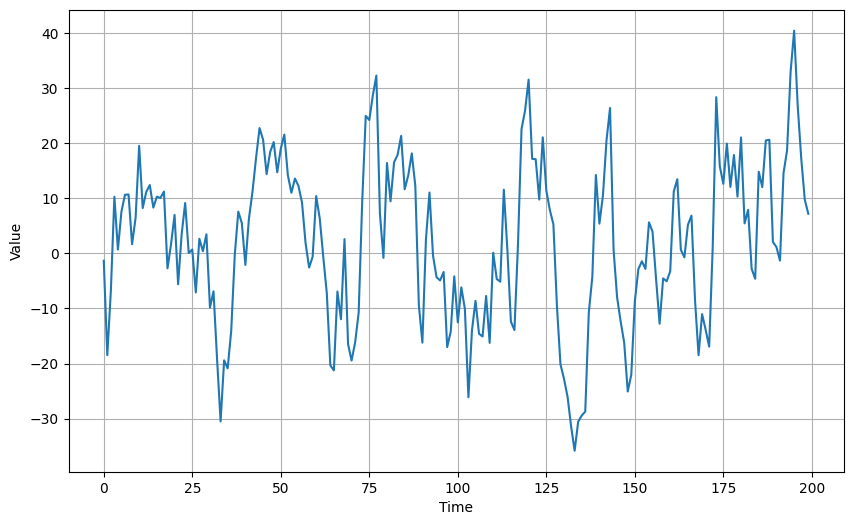

In [14]:
series = autocorrelation2( time, 10)

plt.figure( figsize=( 10, 6))
plot_series( time[ :200], series[ :200])
plt.show()

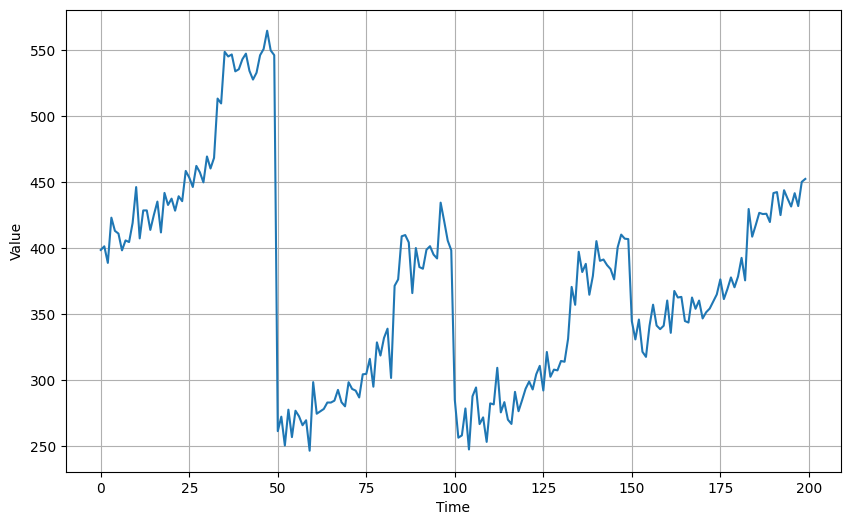

In [15]:
series = autocorrelation( time, 10) + trend( time, 2)

plt.figure( figsize=( 10, 6))
plot_series( time[ :200], series[ :200])
plt.show()

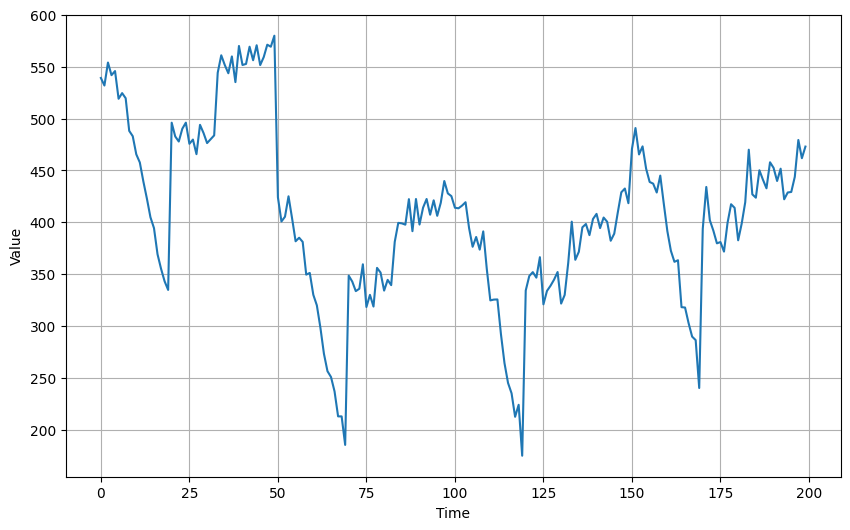

In [16]:
series = autocorrelation( time, 10) + seasonality( time, period=50, amplitude=150) + trend( time, 2)

plt.figure( figsize=( 10, 6))
plot_series( time[ :200], series[ :200])
plt.show()

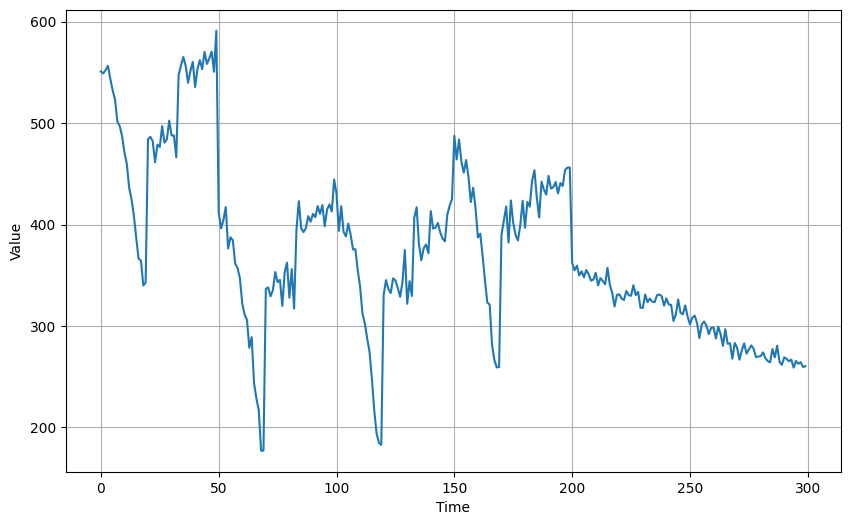

In [17]:
series = autocorrelation( time, 10) + seasonality( time, period=50, amplitude=150) + trend( time, 2)
series2 = autocorrelation( time, 5) + seasonality( time, period=50, amplitude=2) + trend( time, -1) + 550

series[ 200:] = series2[ 200:]

plt.figure( figsize=( 10, 6))
plot_series( time[ :300], series[ :300])
plt.show()

In [18]:
def impulses( time, num_impulses, amplitude=1, seed=None):
	rnd = np.random.RandomState( seed)
	impulse_indices = rnd.randint( len( time), size=num_impulses)

	series = np.zeros( len( time))

	for idx in impulse_indices:
		series[ idx] += rnd.rand() * amplitude

	return series

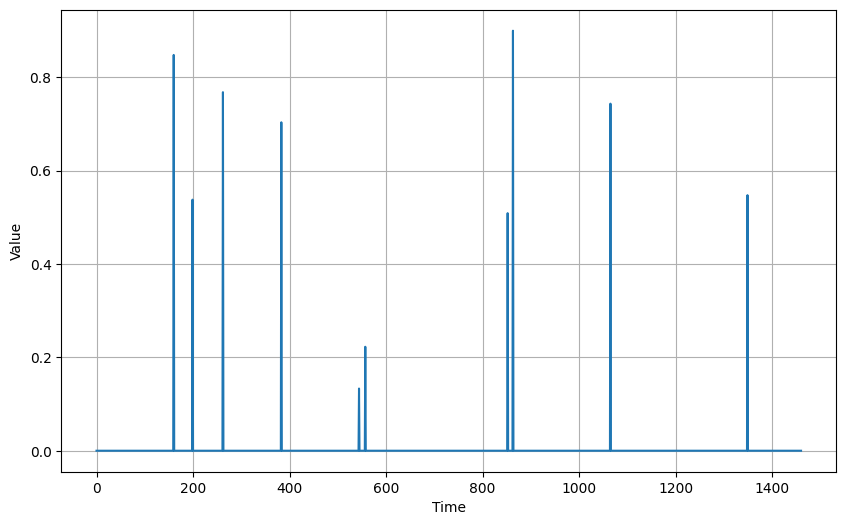

In [19]:
series = impulses( time, 10)

plt.figure( figsize=( 10, 6))
plot_series( time, series)
plt.show()

In [20]:
def autocorrelation3( source, ds):
	ar = source.copy()	

	for step, _ in enumerate( source):
		for lag, d in ds.items():
			if step - lag > 0:
				ar[ step] += d * ar[ step - lag]

	return ar

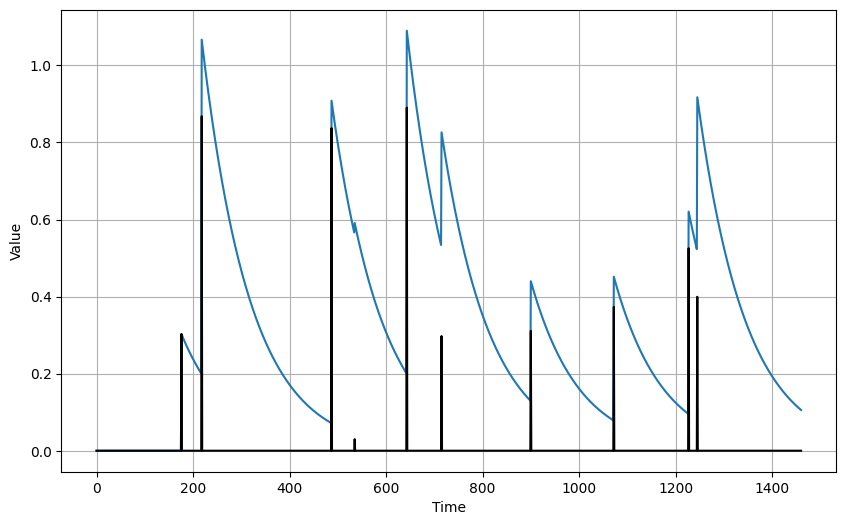

In [21]:
signal = impulses( time, 10)
series = autocorrelation3( signal, { 1: 0.99})

plt.figure( figsize=( 10, 6))
plot_series( time, series)
plt.plot( time, signal, "k-")
plt.show()

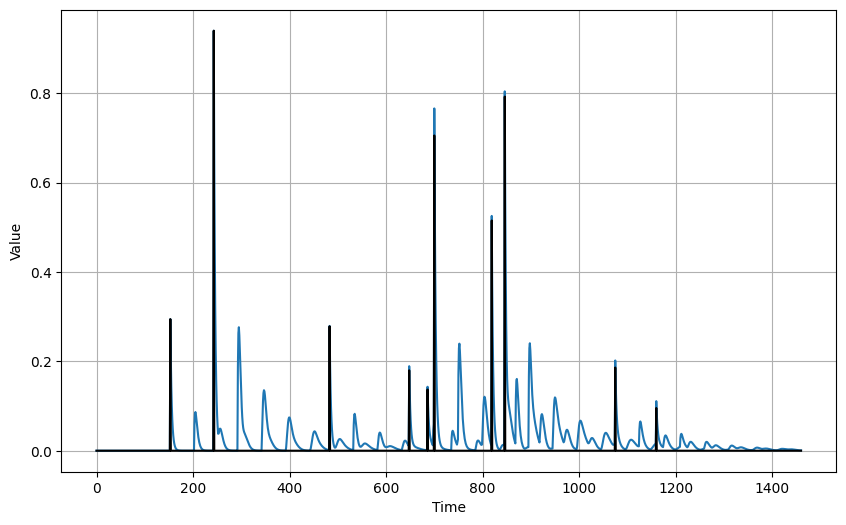

In [22]:
signal = impulses( time, 10)
series = autocorrelation3( signal, { 1: 0.70, 50: 0.2})

plt.figure( figsize=( 10, 6))
plot_series( time, series)
plt.plot( time, signal, "k-")
plt.show()